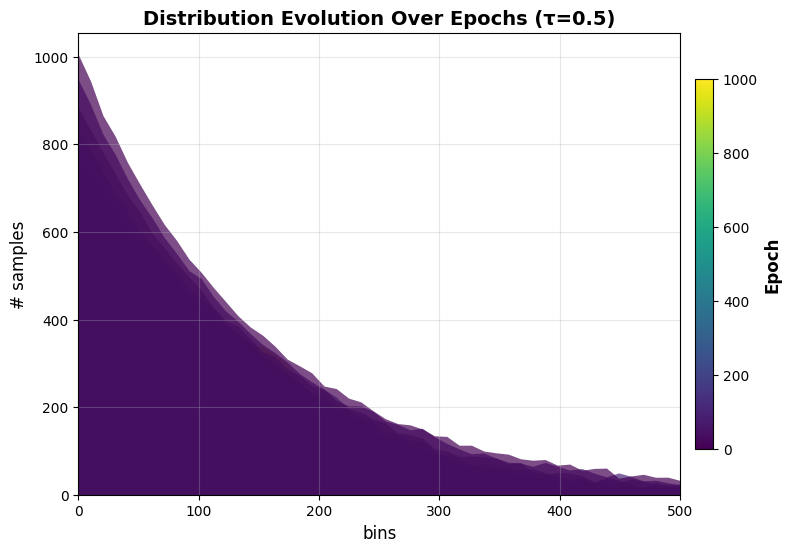

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# import scienceplots  # noqa: F401

# plt.style.use(["science"])

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data for multiple epochs
def generate_epoch_data(epoch, num_bins=50):
    """Generate histogram data that evolves over epochs"""
    x = np.linspace(0, 500, num_bins)
    max_epoch = 1000
    
    if epoch == 0:
        # Initial epoch: high values that decay exponentially
        y = 1000 * np.exp(-x / 150)
    else:
        # Evolution: gradual shift and concentration
        progress = epoch / max_epoch
        
        # Shift the peak location
        peak_shift = progress * 100
        
        # Make distribution more concentrated over time
        width = 150 * (1 - progress * 0.7)
        
        # Create a combination of exponential decay and gaussian
        exp_component = (1000 - epoch * 0.8) * np.exp(-x / (150 - peak_shift * 0.5))
        gauss_component = 300 * progress * np.exp(-((x - (50 + peak_shift))**2) / (2 * width**2))
        
        y = exp_component + gauss_component
    
    # Add some random noise
    noise = np.random.normal(0, 5, len(y))
    y = np.maximum(0, y + noise)
    
    return x, y

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Generate data for multiple epochs
epochs = np.arange(0, 1001, 100)  # Every 100 epochs for clearer visualization
n_epochs = len(epochs)

# Plot each epoch as a filled area (reverse order so early epochs are on bottom)
for i, epoch in enumerate(reversed(epochs)):
    x, y = generate_epoch_data(epoch)
    
    # Color mapping: early epochs (dark), late epochs (bright)
    color_val = (n_epochs - 1 - i) / (n_epochs - 1)
    color = plt.cm.viridis(color_val)
    
    # Plot with some transparency
    ax.fill_between(x, 0, y, color=color, alpha=0.7, linewidth=0)

# Customize the plot
ax.set_xlabel('bins', fontsize=12)
ax.set_ylabel('# samples', fontsize=12)
ax.set_title('Distribution Evolution Over Epochs (τ=0.5)', fontsize=14, fontweight='bold')
ax.set_xlim(0, 500)
ax.set_ylim(0, None)
ax.grid(True, alpha=0.3)

# Add colorbar on the right
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1000))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Epoch', fontsize=12, fontweight='bold')

# Adjust subplot parameters manually
plt.subplots_adjust(right=0.85)

# Display the plot
plt.show()

# Uncomment to save the figure
# plt.savefig('epoch_histogram.png', dpi=300, bbox_inches='tight')